In [374]:
import pandas as pd

In [375]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [376]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3890,ham,No problem. We will be spending a lot of quali...,NaN,NaN,NaN
3317,ham,I'm freezing and craving ice. Fml,NaN,NaN,NaN
475,ham,Ok I'm gonna head up to usf in like fifteen mi...,NaN,NaN,NaN
3514,ham,I'm job profile seems like bpo..,NaN,NaN,NaN
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN


In [377]:
df.shape

(5572, 5)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [379]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [380]:
df.sample(3)

,v1,v2
3442,ham,Your board is working fine. The issue of overh...
1801,ham,I wanna watch that movie
4807,ham,What's up my own oga. Left my phone at home an...


In [381]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [382]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [383]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [384]:
df['target']=encoder.fit_transform(df['target'])


In [385]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [386]:
df.isnull().sum()

,0
target,0
text,0


In [387]:
df.duplicated().sum()

403

In [388]:
df=df.drop_duplicates(keep='first')

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [390]:
df.sample(10)

,target,text
2569,0,Ultimately tor motive tui achieve korli.
3749,0,"Buzz! Hey, my Love ! I think of you and hope y..."
5486,0,Ofcourse I also upload some songs
2775,0,We confirm eating at esplanade?
3902,0,Waiting in e car 4 my mum lor. U leh? Reach ho...
2120,0,"Argh my 3g is spotty, anyway the only thing I ..."
4995,0,Happy new year. Hope you are having a good sem...
3765,0,Yes.mum lookin strong:)
419,1,Send a logo 2 ur lover - 2 names joined by a h...
1393,0,Oh ok..


In [391]:
df.duplicated().sum()

0

In [392]:
df['target'].value_counts()

,count
target,
0,4516
1,653


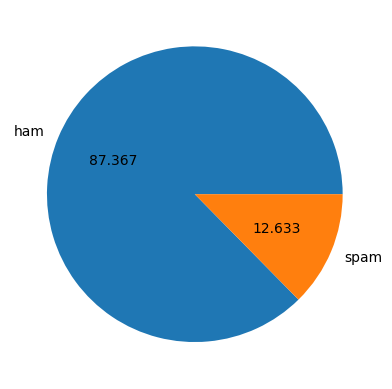

In [393]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [394]:
import nltk

In [395]:
pip install nltk


In [396]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [397]:
#lenght_of_word
df['num_characters']=df['text'].apply(len)

In [398]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [399]:
#num_Of_words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [400]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [401]:
#num_Of_words
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [402]:
df['num_sentences']


,num_sentences
0,2
1,2
2,2
3,1
4,1
...,...
5567,4
5568,1
5569,2
5570,1


In [403]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [404]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [405]:
#individual_analaysis_for_ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [406]:
#individual_analaysis_for_sham
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [407]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

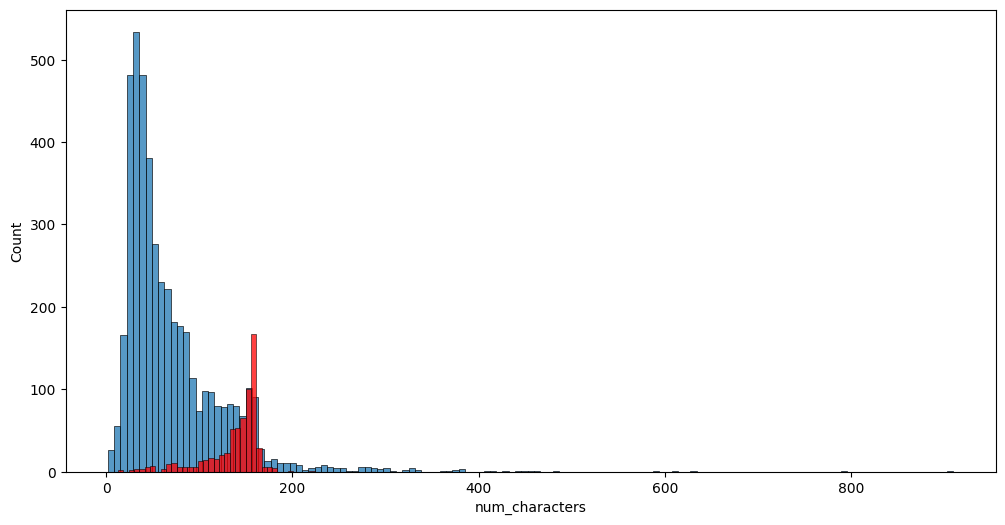

In [408]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

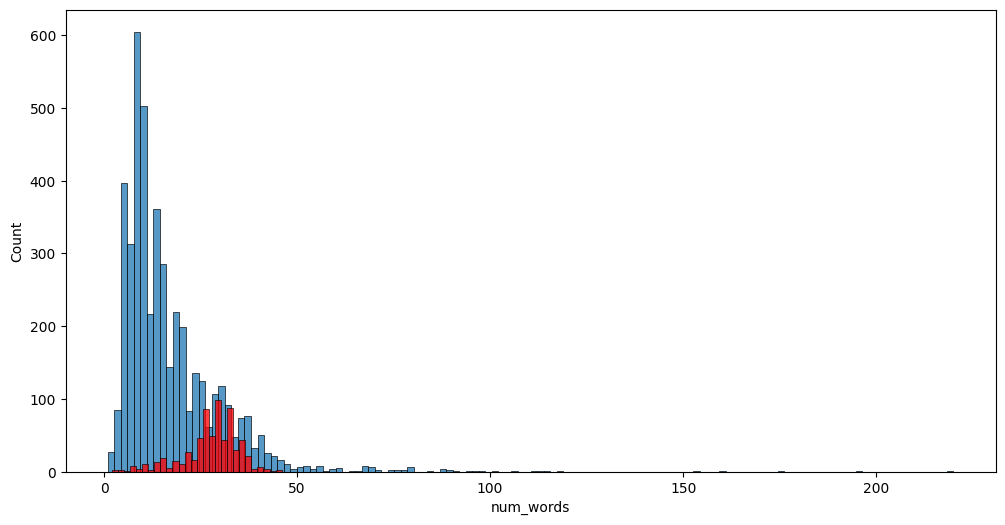

In [409]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

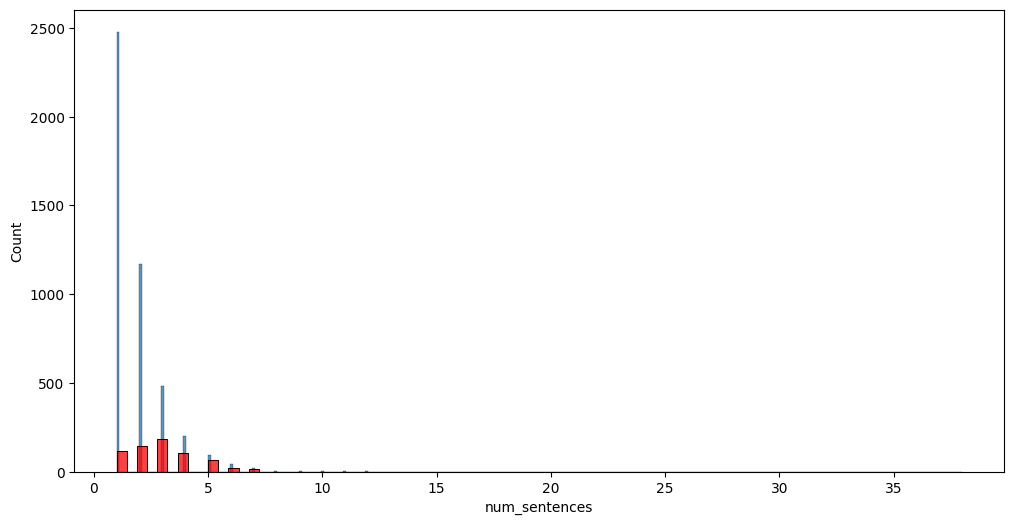

In [410]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

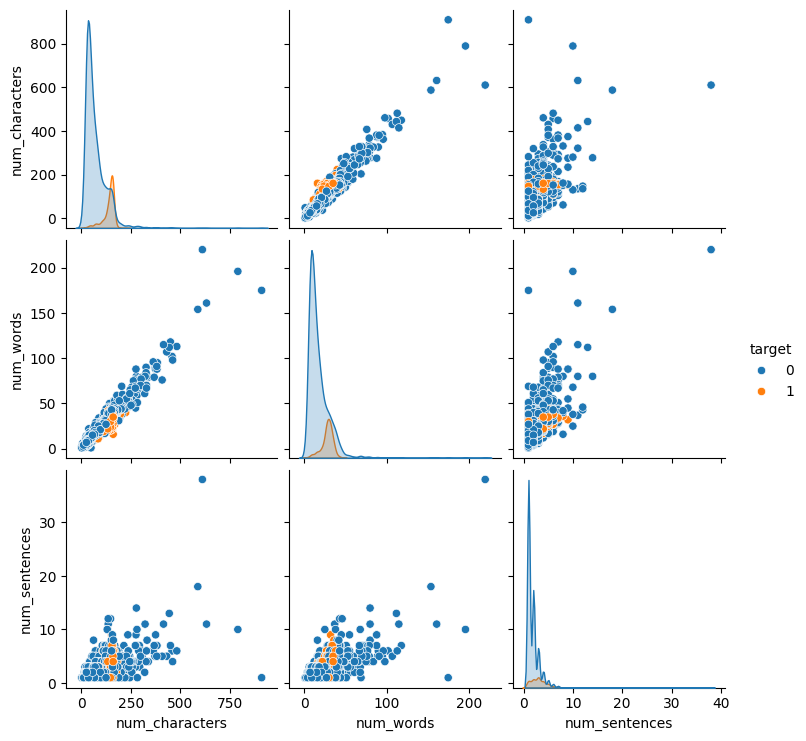

In [411]:
sns.pairplot(df,hue='target')

<Axes: >

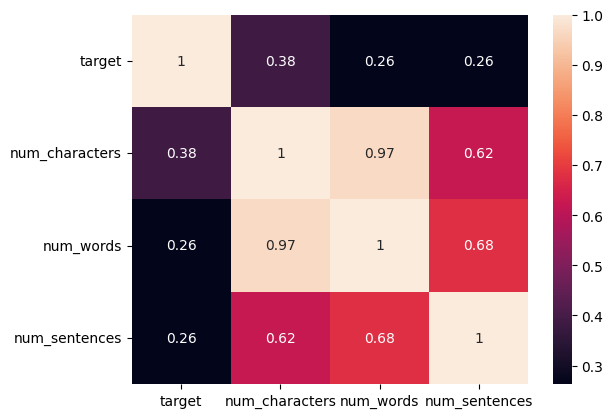

In [412]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [413]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():  # Removing non-alphanumeric characters
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
       y.append(ps.stem(i))



    return " ".join(y)




In [414]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [415]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [416]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [417]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [418]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [419]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('')

''

In [420]:
df['transformed_text']=df['text'].apply(transform_text)

In [421]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [422]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [423]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

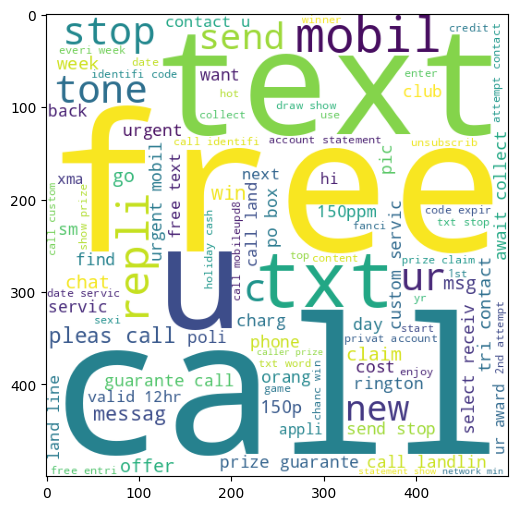

In [424]:
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)

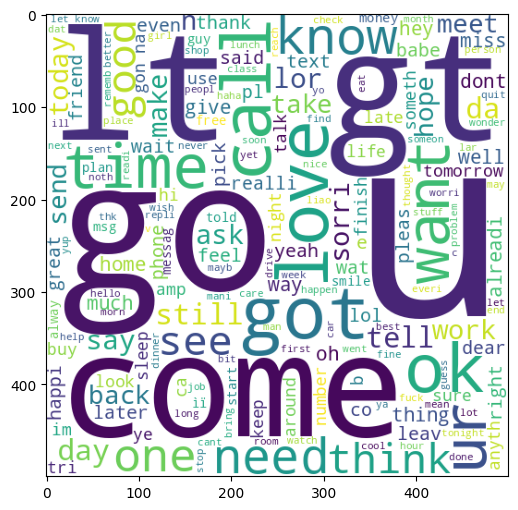

In [425]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(ham_wc)

In [426]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [427]:
#spam_corpus=[]
#for msg in df[df['target']==1]['transformed_text'].tolist():
 #  for word in msg.split():
     # spam_corpus.append(word)

In [428]:
#len(spam_corpus)

In [429]:
#from collections import Counter
#data=pd.DataFrame(Counter(spam_corpus).most_common(30))
#sns.barplot(x=df[0], y=df[1])
#plt.xticks(rotation='vertical')
#plt.show()


In [430]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [431]:
#ham_corpus=[]
#for msg in df[df['target']==0]['transformed_text'].tolist():
 #   for word in msg.split():
  #     ham_corpus.append(word)

In [432]:
#len(ham_corpus)

In [460]:
from  sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [461]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [462]:
X.shape

(5169, 6708)

In [463]:
y=df['target'].values

In [464]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [465]:
from sklearn.model_selection import train_test_split

In [466]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [467]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [468]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print("accuracy score:")
print(accuracy_score(Y_test,Y_pred1))

print("\nconfusion matrix")
print(confusion_matrix(Y_test,Y_pred1))

print("\nprecison score")
print(precision_score(Y_test,Y_pred1))

accuracy score:
0.8646034816247582

confusion matrix
[[776 119]
 [ 21 118]]

precison score
0.4978902953586498


In [469]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print("accuracy score:")
print(accuracy_score(Y_test,Y_pred2))

print("\nconfusion matrix")
print(confusion_matrix(Y_test,Y_pred2))

print("\nprecison score")
print(precision_score(Y_test,Y_pred2))

accuracy score:
0.9574468085106383

confusion matrix
[[895   0]
 [ 44  95]]

precison score
1.0


In [470]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print("accuracy score:")
print(accuracy_score(Y_test,Y_pred3))

print("\nconfusion matrix")
print(confusion_matrix(Y_test,Y_pred3))

print("\nprecison score")
print(precision_score(Y_test,Y_pred3))

accuracy score:
0.9613152804642167

confusion matrix
[[892   3]
 [ 37 102]]

precison score
0.9714285714285714
